In [1]:
from PIL import Image
import os
import re
import shutil

In [2]:
path_to_data = "C:/Users/cleme/OneDrive/Desktop/cat_breeds_classification/model/images/"
path_to_new_data = "C:/Users/cleme/OneDrive/Desktop/cat_breeds_classification/model/dataset/"
temp = re.compile("([a-zA-Z\D]+)([0-9]+)")

In [3]:
species=[]
for i in os.listdir(path_to_data):
    if i.endswith(".jpg"):
        name= i.split(".")
        res = temp.match(name[0]).groups()
        name=(res[0][:-1])
        if name not in species:
            species.append(name)
            

print(species)

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [4]:
cd images

C:\Users\cleme\OneDrive\Desktop\cat_breeds_classification\model\images


In [5]:
count=0
for i in os.listdir():
    if i.endswith(".jpg"):
        name= i.split(".")
        res = temp.match(name[0]).groups()
        name=(res[0][:-1])
        if name == species[count]:
            species_folder = path_to_new_data+species[count]
            if not os.path.exists(species_folder):
                os.makedirs(species_folder)
            shutil.copy(i,species_folder)
        else:
            count+=1

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [12]:
cd ..

C:\Users\cleme\OneDrive\Desktop\cat_breeds_classification\model


In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=30

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2389 files belonging to 12 classes.


In [4]:
class_names=dataset.class_names
class_names

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx']

In [5]:
len(dataset)

75

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].shape)
    print(image_batch[0].numpy())

(32, 256, 256, 3)
[ 7  5 11 11  5  2  7  6 11 11 11  9 10 11  0 10 11  8  6  8  5 11  2  5
  6  6  8  9 11  0  5  1]
(256, 256, 3)
[[[139.17822  133.9751   128.1626  ]
  [138.40186  130.15186  125.339355]
  [138.43408  133.19678  127.188965]
  ...
  [142.90527  142.34277  134.90527 ]
  [135.54297  131.54297  130.54297 ]
  [149.58936  145.88379  144.78564 ]]

 [[124.92969  123.512695 118.512695]
  [140.08154  135.64404  132.20654 ]
  [150.44824  148.0332   143.65039 ]
  ...
  [150.77588  146.65088  142.77588 ]
  [151.70166  147.70166  146.70166 ]
  [141.10791  138.67822  137.15479 ]]

 [[127.55957  126.55957  121.55957 ]
  [137.43994  137.0581   132.71777 ]
  [148.70898  149.58398  144.62256 ]
  ...
  [145.19922  139.97949  138.71533 ]
  [132.48828  128.48828  127.48828 ]
  [143.34277  140.91309  139.38965 ]]

 ...

 [[133.36377  129.36377  128.48877 ]
  [134.62354  130.62354  129.74854 ]
  [137.61719  133.68896  131.94727 ]
  ...
  [121.54199  125.79248  122.098145]
  [158.35693  160.2

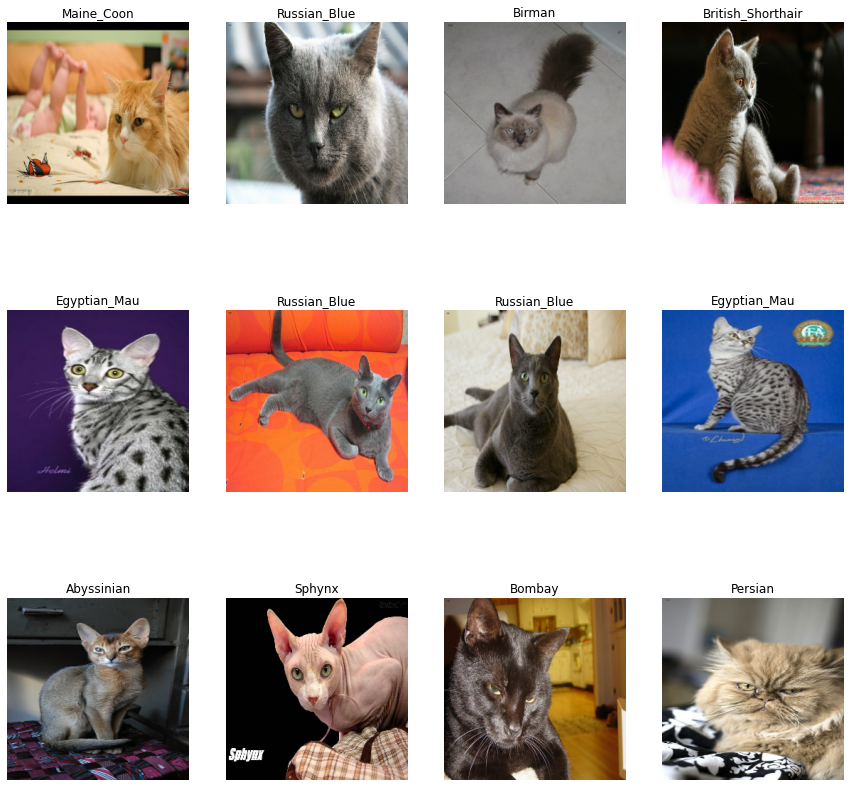

In [7]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

80% ==> training
20% ==> 10% validation, 10% test

In [8]:
train_size=0.8
len(dataset)*train_size

60.0

In [9]:
train_ds = dataset.take(60)
len(train_ds)

60

In [30]:
test_ds = dataset.skip(60)
len(test_ds)

15

In [31]:
val_size=0.1
len(dataset)*val_size

7.5

In [32]:
val_ds = test_ds.take(8)
len(val_ds)

8

In [33]:
test_ds = test_ds.skip(8)
len(test_ds)

7

In [10]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size =int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds,val_ds,test_ds
    

In [11]:
train_ds,val_ds,test_ds =get_dataset_partitions_tf(dataset)

In [12]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

60
7
8


In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [15]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 12
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=8,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
60/60 [==============================] - 61s 1s/step - loss: 1.3046 - accuracy: 0.5217 - val_loss: 1.2278 - val_accuracy: 0.5689
Epoch 2/50
60/60 [==============================] - 62s 1s/step - loss: 1.2958 - accuracy: 0.5223 - val_loss: 1.2404 - val_accuracy: 0.5453
Epoch 3/50
60/60 [==============================] - 62s 1s/step - loss: 1.2869 - accuracy: 0.5359 - val_loss: 1.2019 - val_accuracy: 0.5616
Epoch 4/50
60/60 [==============================] - 62s 1s/step - loss: 1.2541 - accuracy: 0.5422 - val_loss: 1.1382 - val_accuracy: 0.5804
Epoch 5/50
60/60 [==============================] - 62s 1s/step - loss: 1.2505 - accuracy: 0.5485 - val_loss: 1.2120 - val_accuracy: 0.5689
Epoch 6/50
60/60 [==============================] - 62s 1s/step - loss: 1.2488 - accuracy: 0.5495 - val_loss: 1.1802 - val_accuracy: 0.5668
Epoch 7/50
60/60 [==============================] - 62s 1s/step - loss: 1.2068 - accuracy: 0.5767 - val_loss: 1.2025 - val_accuracy: 0.5568
Epoch 8/50
60/60 [==

In [40]:
history2=model.fit(
    train_ds,
    epochs=50,
    batch_size=4,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
60/60 [==============================] - 60s 1s/step - loss: 0.7455 - accuracy: 0.7224 - val_loss: 0.6793 - val_accuracy: 0.7501
Epoch 2/50
60/60 [==============================] - 61s 1s/step - loss: 0.7591 - accuracy: 0.7124 - val_loss: 0.7171 - val_accuracy: 0.7349
Epoch 3/50
60/60 [==============================] - 61s 1s/step - loss: 0.7461 - accuracy: 0.7302 - val_loss: 0.6908 - val_accuracy: 0.7533
Epoch 4/50
60/60 [==============================] - 61s 1s/step - loss: 0.7613 - accuracy: 0.7150 - val_loss: 0.6942 - val_accuracy: 0.7376
Epoch 5/50
60/60 [==============================] - 61s 1s/step - loss: 0.7160 - accuracy: 0.7381 - val_loss: 0.6819 - val_accuracy: 0.7402
Epoch 6/50
60/60 [==============================] - 61s 1s/step - loss: 0.7500 - accuracy: 0.7224 - val_loss: 0.6911 - val_accuracy: 0.7391
Epoch 7/50
60/60 [==============================] - 61s 1s/step - loss: 0.6971 - accuracy: 0.7465 - val_loss: 0.6719 - val_accuracy: 0.7496
Epoch 8/50
60/60 [==

In [45]:
scores = model.evaluate(test_ds)

60/60 [==============================] - 9s 156ms/step - loss: 0.4220 - accuracy: 0.8439


In [46]:
scores

[0.42202228307724, 0.8438973426818848]

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 60}

In [47]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

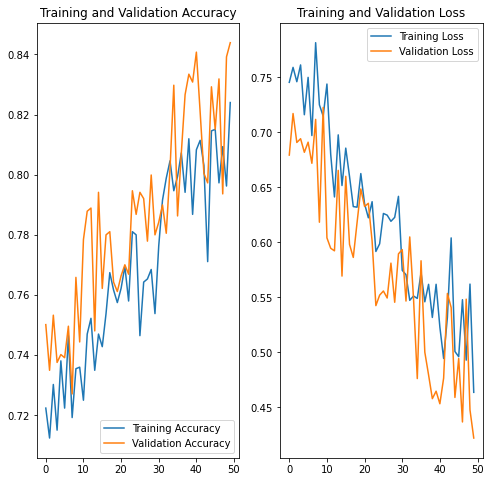

In [52]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Siamese
predicted label: Siamese


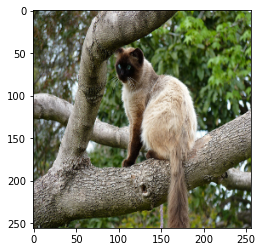

In [54]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [55]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

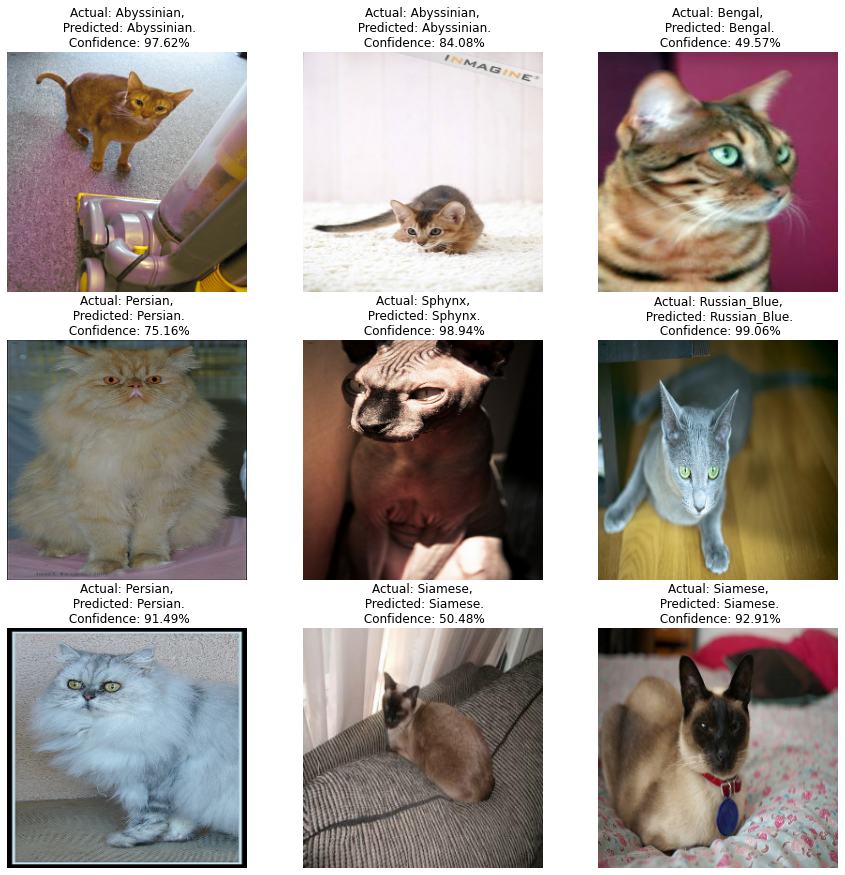

In [57]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")